<a href="https://colab.research.google.com/github/MosesIbe23/CSE450_Machine_Learning/blob/main/Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('https://github.com/fivethirtyeight/data/raw/master/star-wars-survey/StarWars.csv', encoding='ISO-8859-1')
#df.info()
#df.head()
#housing.head()

In [50]:

#Rename Columns for easier wrangling

df.rename(columns={
    'Have you seen any of the 6 films in the Star Wars franchise?': 'Seen_any_movies?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?': 'Fan_of_the_film?',
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_1',
    'Unnamed: 10': 'rank_2',
    'Unnamed: 11': 'rank_3',
    'Unnamed: 12': 'rank_4',
    'Unnamed: 13': 'rank_5',
    'Unnamed: 14': 'rank_6',
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'fav_char_1',
    'Unnamed: 16': 'fav_char_2',
    'Unnamed: 17': 'fav_char_3',
    'Unnamed: 18': 'fav_char_4',
    'Unnamed: 19': 'fav_char_5',
    'Unnamed: 20': 'fav_char_6',
    'Unnamed: 21': 'fav_char_7',
    'Unnamed: 22': 'fav_char_8',
    'Unnamed: 23': 'fav_char_9',
    'Unnamed: 24': 'fav_char_10',
    'Unnamed: 25': 'fav_char_11',
    'Unnamed: 26': 'fav_char_12',
    'Unnamed: 27': 'fav_char_13',
    'Unnamed: 28': 'fav_char_14',
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.1': 'fav_char_15',
    'Unnamed: 30': 'fav_char_16',
    'Unnamed: 31': 'fav_char_17',
    'Unnamed: 32': 'fav_char_18',
    'Unnamed: 33': 'fav_char_19',
    'Unnamed: 34': 'fav_char_20',
    'Unnamed: 35': 'fav_char_21',
    'Unnamed: 36': 'fav_char_22',
    'Unnamed: 37': 'fav_char_23',
    'Unnamed: 38': 'fav_char_24',
    'Unnamed: 39': 'fav_char_25',
    'Unnamed: 40': 'fav_char_26',
    'Unnamed: 41': 'fav_char_27',
    'Unnamed: 42': 'fav_char_28',
    'Which character shot first?': 'Character_shot_first?',
    'Are you familiar with the Expanded Universe?': 'Familiar_expanded_universe?',
    'Do you consider yourself to be a fan of the Expanded Universe?æ': 'Expanded_universe_fan?',
    'Do you consider yourself to be a fan of the Star Trek franchise?': 'Startrek_fan?',
    'Gender': 'Gender',
    'Age': 'Age',
    'Household Income': 'H_Income',
    'Education': 'Education',
    'Location (Census Region)': 'Location'
}, inplace=True)

df.head()


,RespondentID,Seen_any_movies?,Fan_of_the_film?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,...,fav_char_14,Character_shot_first?,Familiar_expanded_universe?,Expanded_universe_fan?,Startrek_fan?,Gender,Age,H_Income,Education,Location
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [51]:
#Drop RespondentID column

df.drop('RespondentID', axis=1, inplace=True)
#df

# Filter respondents who have seen at least one film
df = df[df['Seen_any_movies?'] == 'Yes']

# Create a new column for age
age_mapping = {
    '18-29': 1,
    '30-44': 2,
    '45-60': 3,
    '> 60': 4
}
df['age_numeric'] = df['Age'].map(age_mapping)
df.drop('Age', axis=1, inplace=True)

# Create a new column for education
education_mapping = {
    'High school degree': 1,
    'Some college or Associate degree': 2,
    'Bachelor degree': 3,
    'Graduate degree': 4
}
df['education_numeric'] = df['Education'].map(education_mapping)
df.drop('Education', axis=1, inplace=True)

# Create a new column for income
income_mapping = {
    '$0 - $24,999': 1,
    '$25,000 - $49,999': 2,
    '$50,000 - $99,999': 3,
    '$100,000 - $149,999': 4,
    '$150,000+': 5
}
df['income_numeric'] = df['H_Income'].map(income_mapping)
df.drop('H_Income', axis=1, inplace=True)

# Create target column
df['target'] = (df['income_numeric'] > 3).astype(int)

df.head()
#df.info()


<ipython-input-51-b6a950c6e984>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_numeric'] = df['Age'].map(age_mapping)
<ipython-input-51-b6a950c6e984>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Age', axis=1, inplace=True)
<ipython-input-51-b6a950c6e984>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,Seen_any_movies?,Fan_of_the_film?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,...,Character_shot_first?,Familiar_expanded_universe?,Expanded_universe_fan?,Startrek_fan?,Gender,Location,age_numeric,education_numeric,income_numeric,target
1,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,...,I don't understand this question,Yes,No,No,Male,South Atlantic,1.0,1.0,NaN,0
3,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,...,I don't understand this question,No,NaN,No,Male,West North Central,1.0,1.0,1.0,0
4,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,...,I don't understand this question,No,NaN,Yes,Male,West North Central,1.0,2.0,4.0,1
5,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,...,Greedo,Yes,No,No,Male,West North Central,1.0,2.0,4.0,1
6,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,4,...,Han,Yes,No,Yes,Male,Middle Atlantic,1.0,3.0,2.0,0


In [52]:
#print(df.isnull().sum())

In [53]:
# Replace blank values with NaN, and drop any remaining rows with missing values
df.replace("", np.nan, inplace=True)

# # Impute missing values
# numerical_cols = ['age_numeric', 'education_numeric', 'income_numeric']
# for col in numerical_cols:
#     df[col].fillna(df[col].mean(), inplace=True)

# # For categorical columns, we'll replace NaN values with the mode
# categorical_cols = ['Gender', 'Location', 'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
# for col in categorical_cols:
#     df[col].fillna(df[col].mode()[0], inplace=True)

# Combine numerical and categorical column logic
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
        if 'N/A' in df[col].unique():  # Check if 'N/A' is in the column
            df[col].replace('N/A', None, inplace=True)  # Replace 'N/A' with NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Ensure column is numeric
        df[col].fillna(df[col].mean(), inplace=True)  # Fill NaN with mean
    else:  # For categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill NaN with mode

# Verify that there are no more missing values
print(df.isnull().sum())

# Map categorical values to numerical values
gender_mapping = {
    'Male': 0,
    'Female': 1
}
df['Gender'] = df['Gender'].map(gender_mapping)

# Encode location column
location_mapping = {
    'East North Central': 1,
    'East South Central': 2,
    'Middle Atlantic': 3,
    'Mountain': 4,
    'New England': 5,
    'Pacific': 6,
    'South Atlantic': 7,
    'West North Central': 8,
    'West South Central': 9
}
df['Location'] = df['Location'].map(location_mapping)
df.head()


Seen_any_movies?               0
Fan_of_the_film?               0
seen_1                         0
seen_2                         0
seen_3                         0
seen_4                         0
seen_5                         0
seen_6                         0
rank_1                         0
rank_2                         0
rank_3                         0
rank_4                         0
rank_5                         0
rank_6                         0
fav_char_1                     0
fav_char_2                     0
fav_char_3                     0
fav_char_4                     0
fav_char_5                     0
fav_char_6                     0
fav_char_7                     0
fav_char_8                     0
fav_char_9                     0
fav_char_10                    0
fav_char_11                    0
fav_char_12                    0
fav_char_13                    0
fav_char_14                    0
Character_shot_first?          0
Familiar_expanded_universe?    0
Expanded_u

<ipython-input-53-902d8d7c3720>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill NaN with mode
<ipython-input-53-902d8d7c3720>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

,Seen_any_movies?,Fan_of_the_film?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,...,Character_shot_first?,Familiar_expanded_universe?,Expanded_universe_fan?,Startrek_fan?,Gender,Location,age_numeric,education_numeric,income_numeric,target
1,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,...,I don't understand this question,Yes,No,No,0,7,1.0,1.0,2.89037,0
3,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,2,...,I don't understand this question,No,No,No,0,8,1.0,1.0,1.00000,0
4,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,...,I don't understand this question,No,No,Yes,0,8,1.0,2.0,4.00000,1
5,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,...,Greedo,Yes,No,No,0,8,1.0,2.0,4.00000,1
6,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,4,...,Han,Yes,No,Yes,0,3,1.0,3.0,2.00000,0


In [54]:
# Define features and target

traindf = pd.get_dummies(df, drop_first= True)
traindf = traindf.reindex(columns=traindf.columns, fill_value=0)
traindf

X = traindf.drop('target', axis = 1)
y = traindf['target']  # Target variable indicating if income is more than $50k

X

,Gender,Location,age_numeric,education_numeric,income_numeric,Fan_of_the_film?_Yes,rank_1_2,rank_1_3,rank_1_4,rank_1_5,...,fav_char_14_Somewhat favorably,fav_char_14_Somewhat unfavorably,fav_char_14_Unfamiliar (N/A),fav_char_14_Very favorably,fav_char_14_Very unfavorably,Character_shot_first?_Han,Character_shot_first?_I don't understand this question,Familiar_expanded_universe?_Yes,Expanded_universe_fan?_Yes,Startrek_fan?_Yes
1,0,7,1.0,1.0,2.89037,True,False,True,False,False,...,False,False,False,True,False,False,True,True,False,False
3,0,8,1.0,1.0,1.00000,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,0,8,1.0,2.0,4.00000,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True
5,0,8,1.0,2.0,4.00000,True,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
6,0,3,1.0,3.0,2.00000,True,False,False,False,False,...,False,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1,6,3.0,2.0,1.00000,True,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
1182,1,1,1.0,2.0,1.00000,True,False,False,False,True,...,False,False,False,True,False,True,False,False,False,True
1183,1,4,2.0,3.0,3.00000,True,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1185,1,1,3.0,2.0,4.00000,True,False,False,True,False,...,False,False,False,True,False,True,False,False,False,True


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       152
           1       1.00      0.97      0.99        36

    accuracy                           0.99       188
   macro avg       1.00      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

[[152   0]
 [  1  35]]
0.9946808510638298

Confusion Matrix:
 [[152   0]
 [  1  35]]


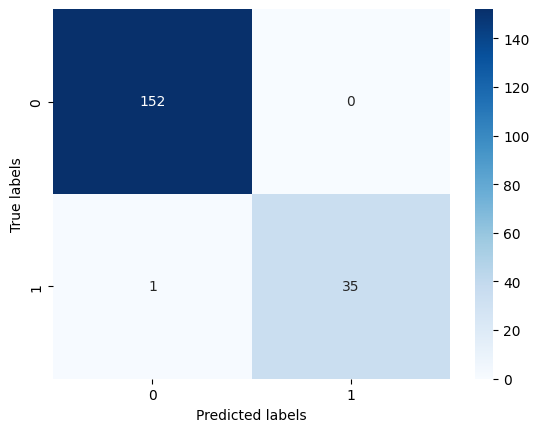

In [55]:
# Split data into training and testing datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
rfmodel= RandomForestClassifier(n_estimators=100, criterion = 'entropy',
class_weight='balanced', random_state=42)
#model = LogisticRegression(max_iter=1000)
rfmodel.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = rfmodel.predict(X_val)

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(accuracy_score(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure()
sns.heatmap(cm, annot = True, fmt="d", cmap = "Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [35]:
# y_pred = xgb_model.predict(X_test_scaled)

# # Calculate evaluation metrics
# mse = round(mean_squared_error(y_test, y_pred), )
# mae = round(mean_absolute_error(y_test, y_pred), )
# rmse = round(np.sqrt(mse), )
# r2 = round(r2_score(y_test, y_pred)*100, 2)

# # Print the results
# print(f"Mean Absolute: USD {mae}")
# print(f"Root Mean Squared: USD {rmse}")
# print(f"R²: {r2}%")


In [36]:
# # Create a scatter plot of actual vs. predicted values
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line (perfect predictions)
# plt.xlabel('Actual Prices')
# plt.ylabel('Predicted Prices')
# plt.title('Actual vs. Predicted Prices')
# plt.show()

In [37]:
# residuals = y_test - y_pred

# plt.figure(figsize=(8, 6))
# plt.scatter(y_pred, residuals, alpha=0.5)
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Predicted Values')
# plt.ylabel('Residuals')
# plt.title('Residuals vs Predicted Values')
# plt.show()

In [38]:
# # Get feature importance from the trained XGBoost model
# feature_importance = xgb_model.feature_importances_

# # Create a bar chart to visualize feature importance
# features = X.columns  # Get the column names
# importance_df = pd.DataFrame({
#     'Feature': features,
#     'Importance': feature_importance
# })
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(10, 10))
# plt.barh(importance_df['Feature'], importance_df['Importance'])
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.title('Feature Importance in Predicting House Prices')
# plt.gca().invert_yaxis()  # Invert the y-axis to have the most important features at the top
# plt.show()